# Libraries used 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import lime
import lime.lime_tabular

# Dataset

In [14]:
df = pd.read_csv('../Dataset/alzheimers_disease_data.csv')
df=df.drop(['PatientID','DoctorInCharge'],axis=1)
x = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']

# EDA

In [3]:
df.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
758,77,0,1,2,19.045999,1,6.086454,2.065466,2.792136,7.769562,...,4.719587,0,0,8.069399,1,0,0,0,1,0
93,63,1,0,0,25.700698,0,4.870564,5.487732,8.561661,6.271848,...,8.548850,0,0,8.294922,0,0,0,1,0,0
652,85,0,0,2,25.754166,0,0.986253,1.195567,1.851793,7.566074,...,8.720573,0,1,6.135860,0,1,0,0,1,0
1521,87,0,0,0,39.306716,0,4.835366,1.898074,6.994039,8.563498,...,4.198624,0,1,0.179617,1,1,1,0,0,1
1002,74,1,0,2,16.139576,1,19.592483,7.085734,3.051825,6.968546,...,1.803488,0,0,7.357100,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [5]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(df.duplicated().sum())

0


In [7]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

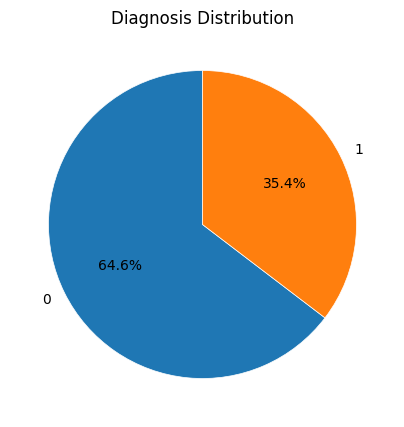

In [8]:
plt.figure(figsize=(5, 5))
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 0.5,'edgecolor':'white'})
plt.title('Diagnosis Distribution')
plt.ylabel("")
plt.show()

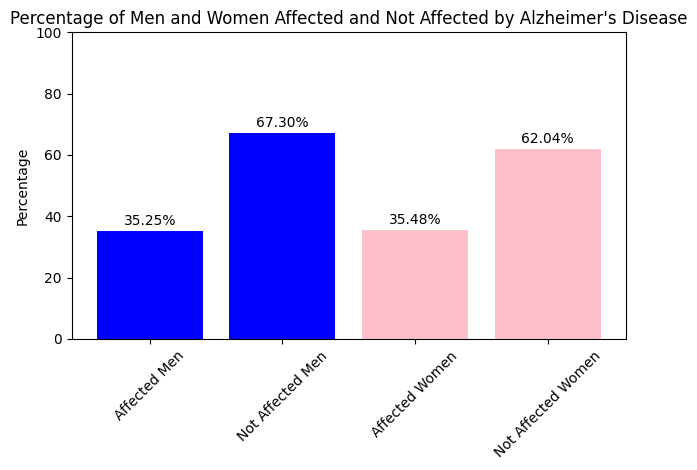

In [9]:
affected_men = df[(df['Gender'] == 1) & (df['Diagnosis'] == 1)].shape[0]
not_affected_men = df[(df['Gender'] == 1) & (df['Diagnosis'] == 0)].shape[0]
affected_women = df[(df['Gender'] == 0) & (df['Diagnosis'] == 1)].shape[0]
not_affected_women = df[(df['Gender'] == 0) & (df['Diagnosis'] == 0)].shape[0]

total_men = df[df['Gender'] == 0].shape[0]
total_women = df[df['Gender'] == 1].shape[0]

percent_affected_men = (affected_men / total_men) * 100
percent_not_affected_men = (not_affected_men / total_men) * 100
percent_affected_women = (affected_women / total_women) * 100
percent_not_affected_women = (not_affected_women / total_women) * 100

labels = ['Affected Men', 'Not Affected Men', 'Affected Women', 'Not Affected Women']
percentages = [percent_affected_men, percent_not_affected_men, percent_affected_women, percent_not_affected_women]

fig, ax = plt.subplots()
bars = ax.bar(labels, percentages, color=['blue', 'blue', 'pink', 'pink'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

ax.set_title('Percentage of Men and Women Affected and Not Affected by Alzheimer\'s Disease')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100) 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['Diagnosis'].sort_values(ascending=False)
print(corr_with_target)

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes                    -0.031508
CholesterolL

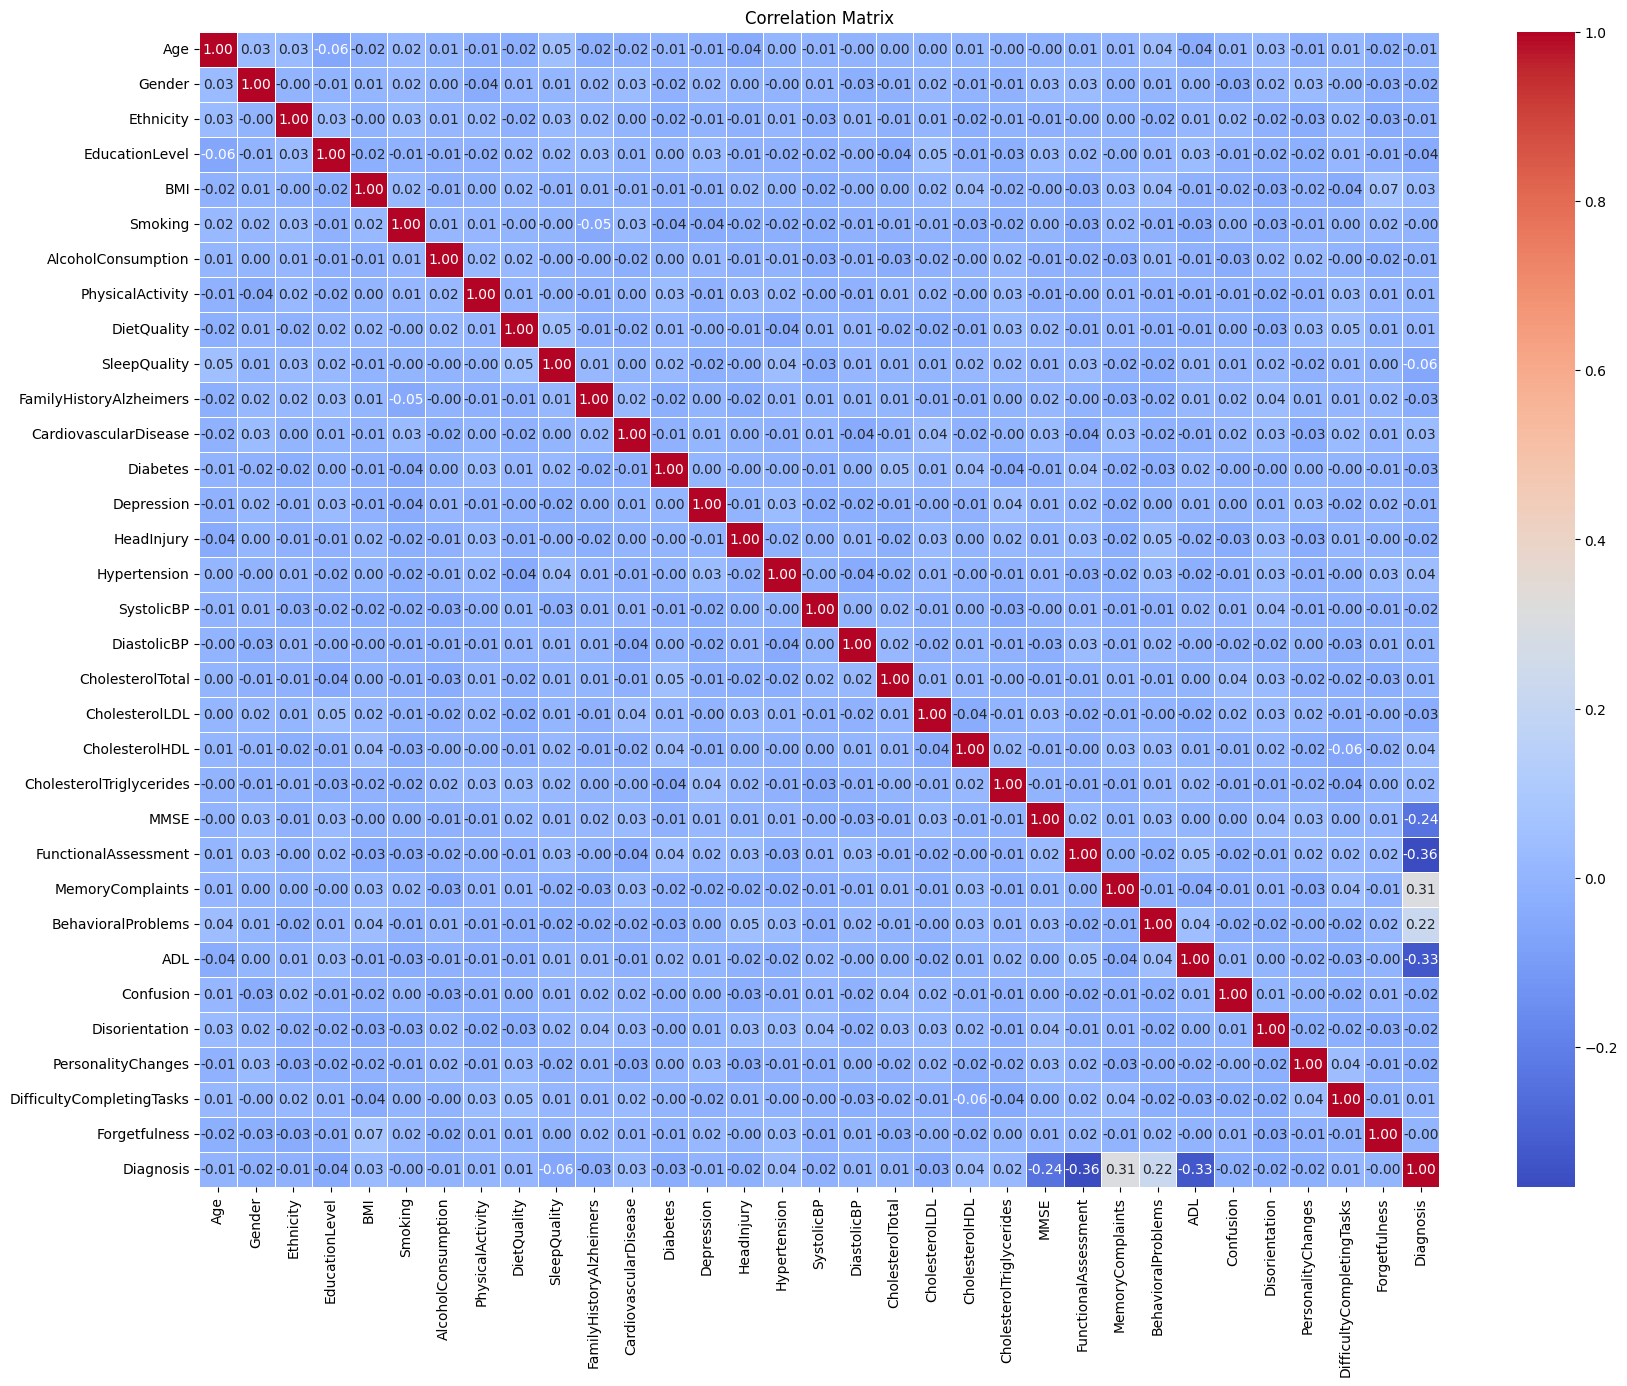

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

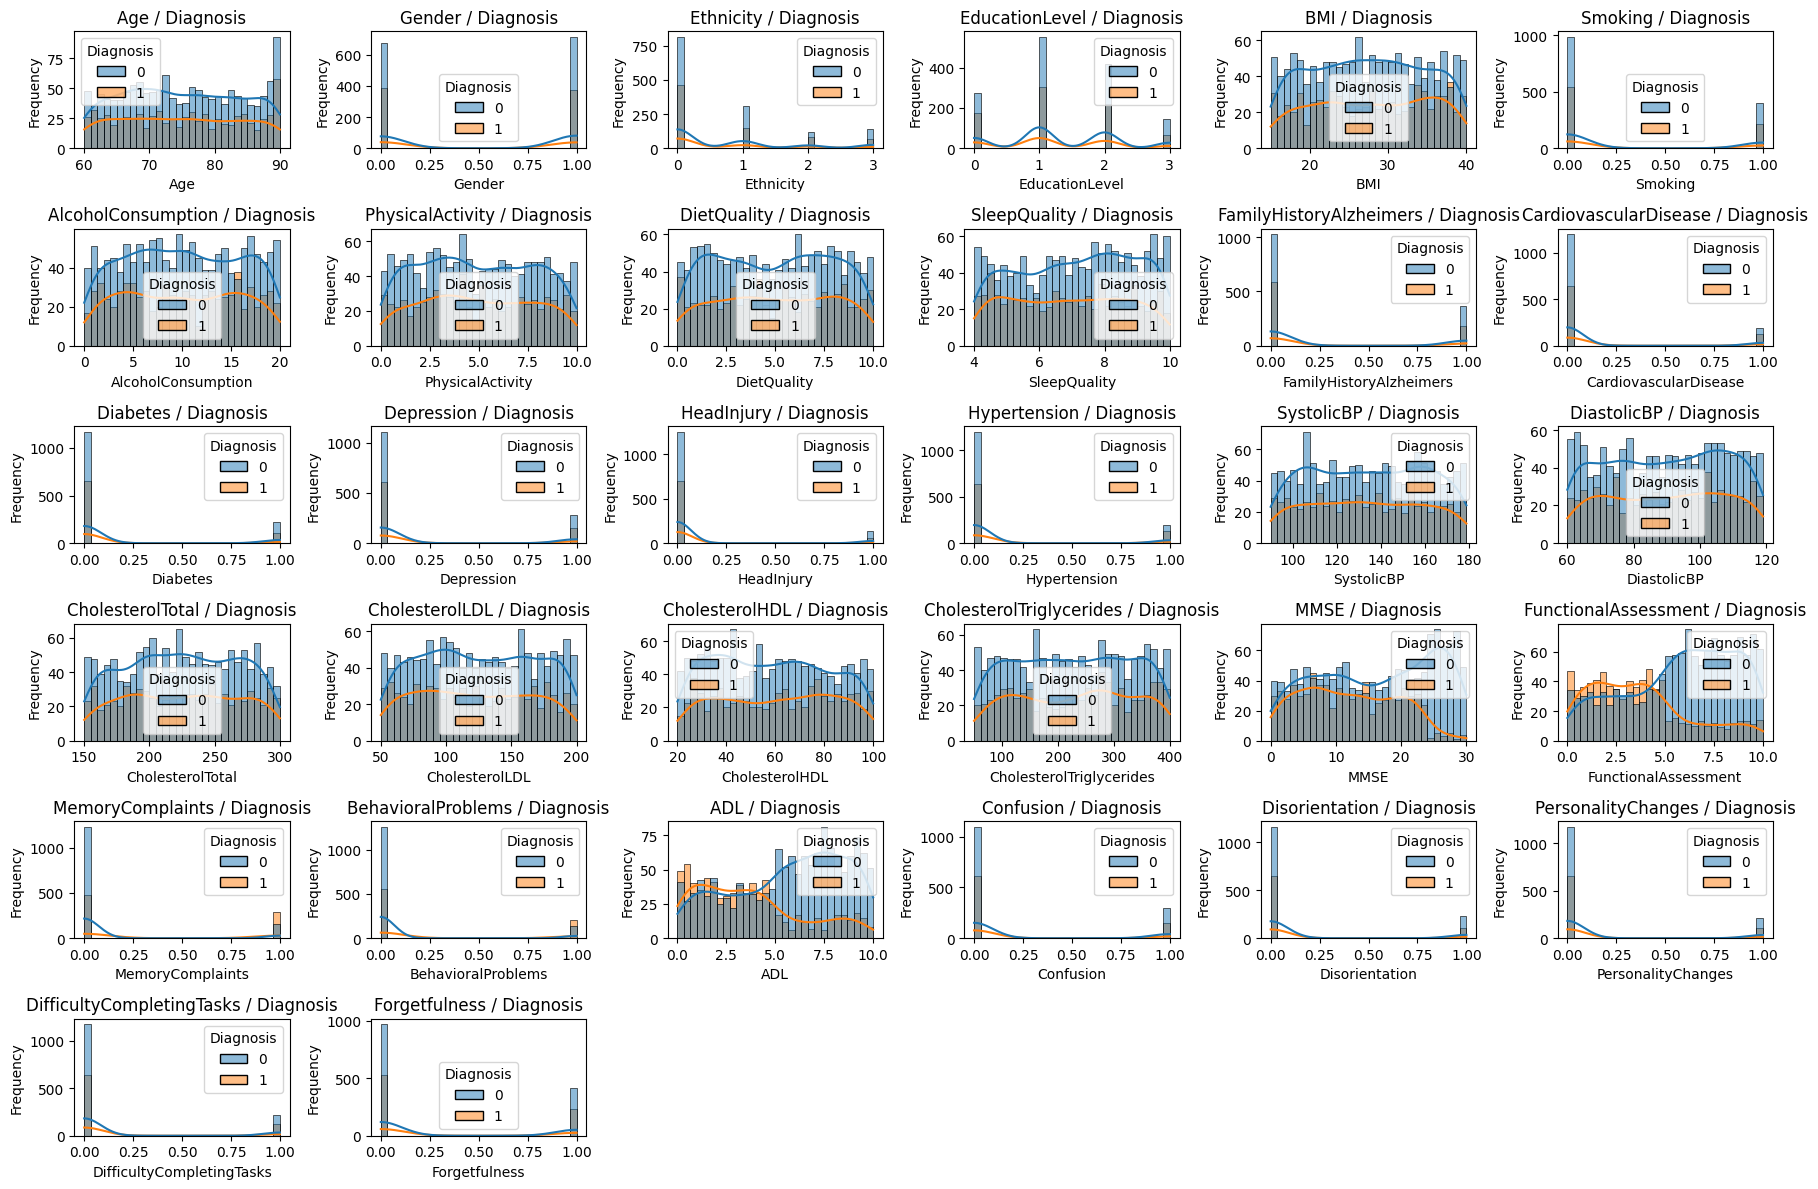

In [12]:
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns
n_cols = 6
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if col != 'Diagnosis':
        sns.histplot(data=df, x=col, hue='Diagnosis', kde=True, bins=30, ax=axes[i])
        axes[i].set(title=f'{col} / Diagnosis', xlabel=col, ylabel='Frequency')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


C:\Users\Aviral\AppData\Local\Temp\ipykernel_8908\3042658312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('bins').size(),labels=df.groupby('bins').size().index, autopct='%.0f%%')
C:\Users\Aviral\AppData\Local\Temp\ipykernel_8908\3042658312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('bins').size(),labels=df.groupby('bins').size().index, autopct='%.0f%%')


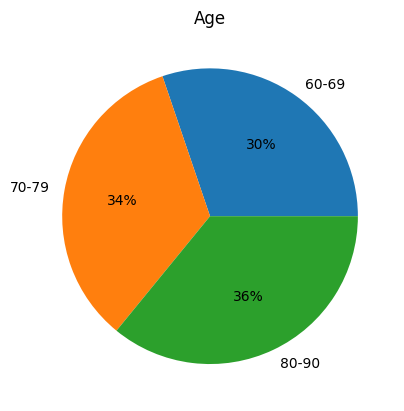

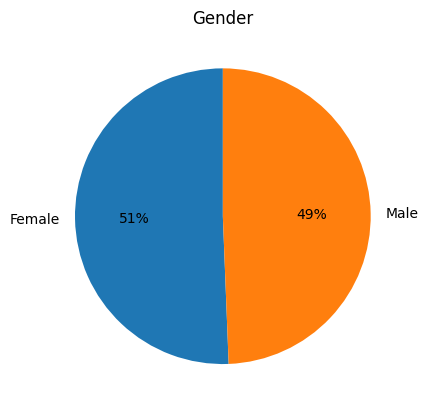

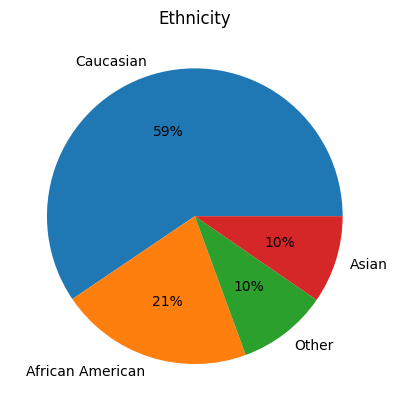

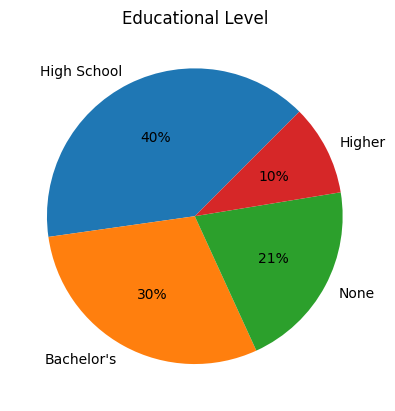

In [13]:
df['bins'] = pd.cut(df['Age'],bins=[60,69,79,90], labels=["60-69","70-79","80-90"])
plt.pie(df.groupby('bins').size(),labels=df.groupby('bins').size().index, autopct='%.0f%%')
plt.title("Age")
plt.show()

plt.pie(df['Gender'].value_counts(),startangle=90,labels=['Female','Male'], autopct='%.0f%%')
plt.title("Gender")
plt.show()

plt.pie(df['Ethnicity'].value_counts(), labels=['Caucasian','African American','Other','Asian'], autopct='%.0f%%')
plt.title("Ethnicity")
plt.show()

plt.pie(df['EducationLevel'].value_counts(),startangle=45, labels=['High School',"Bachelor's",'None','Higher'], autopct='%.0f%%')
plt.title("Educational Level")
plt.show()

df.drop(['bins'],axis=1,inplace=True)

In [14]:
total=df['EducationLevel'].value_counts().sort_index()
diagnosis=df.groupby('EducationLevel')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
y=pd.Series([100]*4)
df_educ=pd.concat([total,diagnosis,percentage,y],axis=1)
df_educ.index=['None','Highschool',"Bachelor's",'Higher']
df_educ.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
print(df_educ)
total=df['Ethnicity'].value_counts().sort_index()
diagnosis=df.groupby('Ethnicity')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
df_ethn=pd.concat([total,diagnosis,percentage,y],axis=1)
df_ethn.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
df_ethn.index=['Caucasian','African American','Asian','Other']
print(df_ethn)
total=df['FamilyHistoryAlzheimers'].value_counts().sort_index()
diagnosis=df.groupby('FamilyHistoryAlzheimers')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
df_famh=pd.concat([total,diagnosis,percentage,y[:2]],axis=1)
df_famh.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
print(df_famh)

            Total  Diagnosis  Diagnosis, %  Total, %
None          446        174     39.013453       100
Highschool    854        302     35.362998       100
Bachelor's    636        217     34.119497       100
Higher        213         67     31.455399       100
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100
   Total  Diagnosis  Diagnosis, %  Total, %
0   1607        583     36.278780       100
1    542        177     32.656827       100


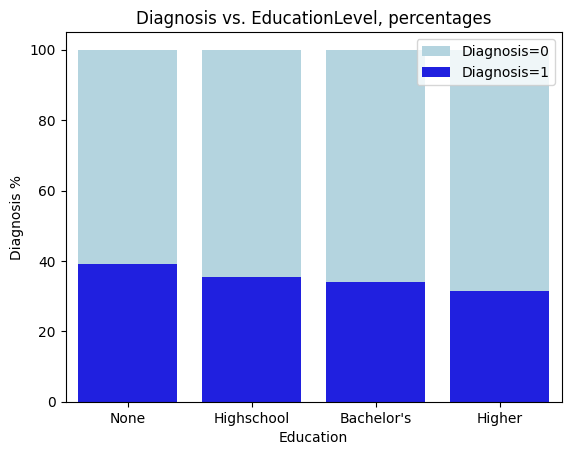

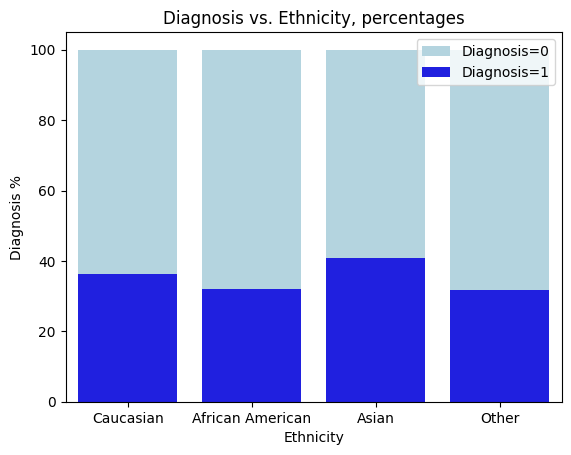

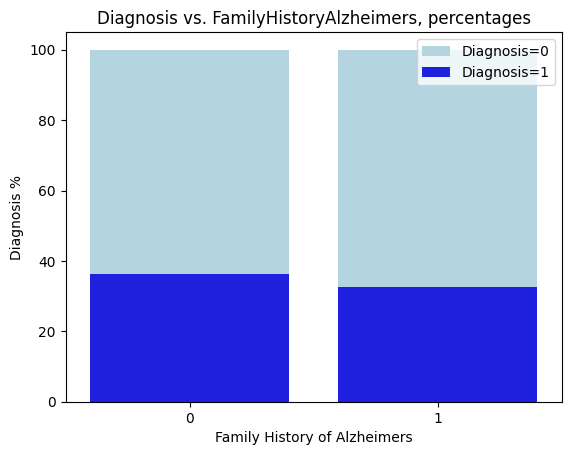

In [15]:
sns.barplot(df_educ,x=df_educ.index,y='Total, %',color='lightblue',label='Diagnosis=0')
sns.barplot(df_educ,x=df_educ.index,y='Diagnosis, %',color='blue',label='Diagnosis=1')
plt.title("Diagnosis vs. EducationLevel, percentages")
plt.xlabel("Education")
plt.ylabel("Diagnosis %")
plt.legend()
plt.show()

sns.barplot(df_ethn,x=df_ethn.index,y='Total, %',color='lightblue',label='Diagnosis=0')
sns.barplot(df_ethn,x=df_ethn.index,y='Diagnosis, %',color='blue',label='Diagnosis=1')
plt.title("Diagnosis vs. Ethnicity, percentages")
plt.xlabel("Ethnicity")
plt.ylabel("Diagnosis %")
plt.legend()
plt.show()

sns.barplot(df_famh,x=df_famh.index,y='Total, %',color='lightblue',label='Diagnosis=0')
sns.barplot(df_famh,x=df_famh.index,y='Diagnosis, %',color='blue',label='Diagnosis=1')
plt.title("Diagnosis vs. FamilyHistoryAlzheimers, percentages")
plt.xlabel("Family History of Alzheimers")
plt.ylabel("Diagnosis %")
plt.legend()
plt.show()

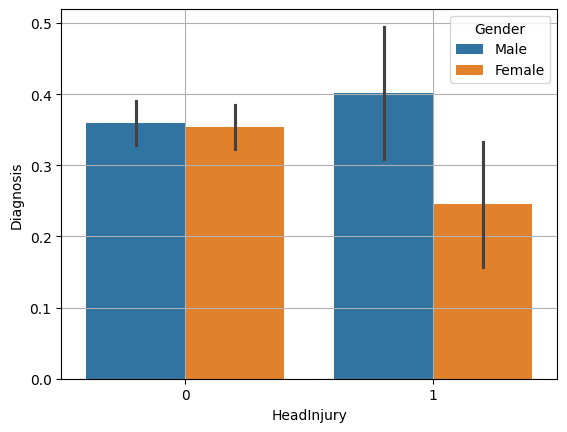

In [16]:
sns.barplot(x=df.HeadInjury,y=df.Diagnosis,hue=df.Gender)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Gender')
plt.grid()
plt.show()

# Training and Testing of Dataset

In [17]:
y = df['Diagnosis']
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (2149, 32)
Shape of y: (2149,)


In [18]:
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x, y)
selected_features= x.columns[fit.get_support(indices=True)]

In [19]:
X = x[selected_features]

# Random Forest Classifier model

In [20]:
rf_accuracies = []
for i in range(1,6,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    rf_classifier = RandomForestClassifier()

    param_dist = {
        'n_estimators': np.arange(100, 301, 50),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)

    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print ("Details of ",100-i*10,":",i*10,"Model are: ")
    print("")
    
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation accuracy score: {best_score}")

    best_rf_model = random_search.best_estimator_
    y_pred = best_rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)
    print(f"The accuracy of the best model on test data is: {accuracy}")
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    cm_rfc = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm_rfc)
    print("")
print(rf_accuracies)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  90 : 10 Model are: 

Best parameters found: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best cross-validation accuracy score: 0.952940782691355
The accuracy of the best model on test data is: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       142
           1       0.93      0.90      0.92        73

    accuracy                           0.94       215
   macro avg       0.94      0.93      0.94       215
weighted avg       0.94      0.94      0.94       215

Confusion Matrix:
 [[137   5]
 [  7  66]]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  80 : 20 Model are: 

Best parameters found: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best cross-validation accuracy scor

# SVM Model

In [21]:
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5], # relevant only if kernel is 'poly'
    'gamma': ['scale', 'auto']
}

svm_accuracies = []

for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    svc_model = SVC()

    random_search = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_score = random_search.best_score_
    
    print ("Details of ",100-i*10,":",i*10,"Model are: ")
    print("")
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation accuracy score: {best_score}")

    best_svc_model = random_search.best_estimator_
    y_pred = best_svc_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)
    print(f"The accuracy of the best model on test data is: {accuracy}")

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    cm_svm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm_svm)
    print("")

print(svm_accuracies)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  90 : 10 Model are: 

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 1}
Best cross-validation accuracy score: 0.885719832376056
The accuracy of the best model on test data is: 0.8744186046511628
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       142
           1       0.84      0.78      0.81        73

    accuracy                           0.87       215
   macro avg       0.86      0.85      0.86       215
weighted avg       0.87      0.87      0.87       215

Confusion Matrix:
 [[131  11]
 [ 16  57]]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  80 : 20 Model are: 

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10}
Best cross-validation accuracy score: 0.8836327886636383
The accuracy of the best model on test data is: 0.872093023255814
Classificat

# Neural Network Model

In [22]:
nn_accuracies = []
for i in range(1,6,1):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(i/10),random_state=42)

    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)

    clf=MLPClassifier(hidden_layer_sizes=(150,100,50,25),activation='logistic',max_iter=1000,solver = 'adam',learning_rate_init = 0.01, learning_rate = 'adaptive', batch_size = 32)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)

    print ("Details of ",100-i*10,":",i*10,"Model are: ")
    print("")

    accuracy=accuracy_score(y_test,y_pred)
    nn_accuracies.append(accuracy)
    print(f"The accuracy of this model is: {accuracy}")

    report =classification_report(y_test,y_pred)
    print(report)

    cm_nn= confusion_matrix(y_test,y_pred)
    print(cm_nn)
    print("")
print(nn_accuracies)

Details of  90 : 10 Model are: 

The accuracy of this model is: 0.9162790697674419
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       142
           1       0.89      0.86      0.88        73

    accuracy                           0.92       215
   macro avg       0.91      0.90      0.91       215
weighted avg       0.92      0.92      0.92       215

[[134   8]
 [ 10  63]]

Details of  80 : 20 Model are: 

The accuracy of this model is: 0.9
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       277
           1       0.89      0.82      0.85       153

    accuracy                           0.90       430
   macro avg       0.90      0.88      0.89       430
weighted avg       0.90      0.90      0.90       430

[[262  15]
 [ 28 125]]

Details of  70 : 30 Model are: 

The accuracy of this model is: 0.8945736434108527
              precision    recall  f1-score   support

         

# Decision Tree Model

In [23]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_accuracies = []

for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = DecisionTreeClassifier()

    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_score = random_search.best_score_
    
    print ("Details of ",100-i*10,":",i*10,"Model are: ")
    print("")
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation accuracy score: {best_score}")

    best_dt_model = random_search.best_estimator_
    y_pred = best_dt_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    dt_accuracies.append(accuracy)
    print(f"The accuracy of the best model on test data is: {accuracy}")

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    cm_dt = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm_dt)
    print("")

print(dt_accuracies)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  90 : 10 Model are: 

Best parameters found: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Best cross-validation accuracy score: 0.933295845550334
The accuracy of the best model on test data is: 0.9302325581395349
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       142
           1       0.89      0.90      0.90        73

    accuracy                           0.93       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.93      0.93      0.93       215

Confusion Matrix:
 [[134   8]
 [  7  66]]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  80 : 20 Model are: 

Best parameters found: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}
Best cross-validation accura

# KNN Model

In [24]:
param_dist = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

knn_accuracies = []

for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier()

    random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_score = random_search.best_score_
    
    print ("Details of ",100-i*10,":",i*10,"Model are: ")
    print("")
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation accuracy score: {best_score}")

    best_knn_model = random_search.best_estimator_
    y_pred = best_knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"The accuracy of the best model on test data is: {accuracy}")

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    cm_knn = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm_knn)
    print("")

print(knn_accuracies)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  90 : 10 Model are: 

Best parameters found: {'weights': 'distance', 'n_neighbors': 27, 'metric': 'manhattan'}
Best cross-validation accuracy score: 0.8790001472734332
The accuracy of the best model on test data is: 0.8604651162790697
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       142
           1       0.83      0.74      0.78        73

    accuracy                           0.86       215
   macro avg       0.85      0.83      0.84       215
weighted avg       0.86      0.86      0.86       215

Confusion Matrix:
 [[131  11]
 [ 19  54]]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Details of  80 : 20 Model are: 

Best parameters found: {'weights': 'distance', 'n_neighbors': 25, 'metric': 'manhattan'}
Best cross-validation accuracy score: 0.8702505254593532
The accuracy of the best model on test data is: 0.8720930

# Accuracy Table

In [25]:
accuracy_matrix = np.array([rf_accuracies, svm_accuracies, nn_accuracies, dt_accuracies, knn_accuracies]) * 100
accuracy_matrix = np.round(accuracy_matrix, 3)
accuracy_table=pd.DataFrame(accuracy_matrix)
index_names = ['Random Forest', 'SVM', 'Neural Network', 'Decision Tree', 'KNN']
column_names = ['90:10', '80:20', '70:30', '60:40', '50:50']
accuracy_table.index = index_names
accuracy_table.columns = column_names
print(accuracy_table)

                 90:10   80:20   70:30   60:40   50:50
Random Forest   94.419  95.349  93.798  94.070  94.326
SVM             87.442  87.209  85.271  87.442  85.953
Neural Network  91.628  90.000  89.457  89.884  88.837
Decision Tree   93.023  93.488  92.403  92.907  93.209
KNN             86.047  87.209  84.496  83.721  84.093


**Since the accuracy of Random Forest 80:20 Model is the highest, so we will be using it.**

# XAI (Explainable AI)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=20, bootstrap=True)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of this model is: {accuracy}")
report = classification_report(y_test, y_pred)
print(report)
cm_rfc = confusion_matrix(y_test, y_pred)
print(cm_rfc)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=[0, 1], discretize_continuous=True)
i = 0
exp = explainer.explain_instance(X_test[i], rf_classifier.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

The accuracy of this model is: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.97      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.96      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

[[272   5]
 [ 15 138]]


# Cross Validation Implementation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=250)

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of this model is: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

cm_rfc = confusion_matrix(y_test, y_pred)
print(cm_rfc)

Cross-validation scores: [0.93604651 0.96802326 0.96511628 0.94186047 0.93586006]
Mean cross-validation accuracy: 0.949381313987389
The accuracy of this model is: 0.9488372093023256
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

[[271   6]
 [ 16 137]]


# Grid Search with cross validation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=250)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy score: {best_score}")

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the best model on test data is: {accuracy}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm_rfc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_rfc)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation accuracy score: 0.9499627093362262
The accuracy of the best model on test data is: 0.9465116279069767
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.89      0.92       153

    accuracy                           0.95       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.95      0.95      0.95       430

Confusion Matrix:
 [[271   6]
 [ 17 136]]
